In [1]:
import pandas as pd
import matplotlib.pylab as plt
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
import matplotlib.mlab as mlab

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
features = pd.read_csv('../data_processed/acs_merged_features')
complaints = pd.read_csv('../data_processed/DOB_count_illegal_conv_2015_ZC')

In [3]:
features.head()

,Unnamed: 0,Zip Code,Unemployment Rate for Pop > 16 Years (%),Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well',2015 Median Household Income,Count of Illegal Resident Conversion Violations,comp_vio_ratio
0,0,6390.0,9.8,0.0,151083,NaN,NaN
1,1,10001.0,8.4,11.0,86801,0.1,381.000000
2,2,10002.0,8.9,37.4,33726,2.1,34.809524
3,3,10003.0,6.1,4.9,98151,3.1,18.096774
4,4,10004.0,6.1,2.6,119691,0.1,11.000000


In [4]:
#illegal conversion complaints from 2015
complaints.head()

,Unnamed: 0,Incident Zip,Count of Complaints
0,92,11208,642
1,156,11419,617
2,157,11420,438
3,125,11355,355
4,104,11220,331


In [5]:
print(len(complaints))

176


In [6]:
print(complaints.dtypes)
print(features.dtypes)

Unnamed: 0             int64
Incident Zip           int64
Count of Complaints    int64
dtype: object
Unnamed: 0                                                                                       int64
Zip Code                                                                                       float64
Unemployment Rate for Pop > 16 Years (%)                                                        object
Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'     object
2015 Median Household Income                                                                    object
Count of Illegal Resident Conversion Violations                                                float64
comp_vio_ratio                                                                                 float64
dtype: object


In [7]:
complaints['Incident Zip'] = complaints['Incident Zip'].astype(float)

In [8]:
print(complaints.dtypes)
print(features.dtypes)

Unnamed: 0               int64
Incident Zip           float64
Count of Complaints      int64
dtype: object
Unnamed: 0                                                                                       int64
Zip Code                                                                                       float64
Unemployment Rate for Pop > 16 Years (%)                                                        object
Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'     object
2015 Median Household Income                                                                    object
Count of Illegal Resident Conversion Violations                                                float64
comp_vio_ratio                                                                                 float64
dtype: object


In [9]:
model = pd.merge(complaints, features, left_on='Incident Zip', right_on='Zip Code', how='left')

In [10]:
print(len(model))

176


In [11]:
model.isnull().sum()

Unnamed: 0_x                                                                                   0
Incident Zip                                                                                   0
Count of Complaints                                                                            0
Unnamed: 0_y                                                                                   1
Zip Code                                                                                       1
Unemployment Rate for Pop > 16 Years (%)                                                       1
Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'    1
2015 Median Household Income                                                                   1
Count of Illegal Resident Conversion Violations                                                1
comp_vio_ratio                                                                                 1
dtype: int64

In [12]:
model = model.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Zip Code'], axis=1)

In [13]:
model.head()

,Incident Zip,Count of Complaints,Unemployment Rate for Pop > 16 Years (%),Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well',2015 Median Household Income,Count of Illegal Resident Conversion Violations,comp_vio_ratio
0,11208.0,642,10.2,16.9,35698,19.1,33.617801
1,11419.0,617,10.2,14.8,58266,22.1,27.923077
2,11420.0,438,11.0,11.3,59660,19.1,22.937173
3,11355.0,355,7.2,65.8,39168,25.1,14.147410
4,11220.0,331,9.5,56.3,38893,9.1,36.384615


In [14]:
model = model.rename(columns={'Count of Complaints':'complaints', 'Unemployment Rate for Pop > 16 Years (%)':'unemployment',"Percentage of Pop > 5 Years Who Don't Speak English at Home and Speak English < 'Very Well'":'poor_english','2015 Median Household Income':'household_income', 'Count of Illegal Resident Conversion Violations':'violations'})

In [15]:
model.head()

,Incident Zip,complaints,unemployment,poor_english,household_income,violations,comp_vio_ratio
0,11208.0,642,10.2,16.9,35698,19.1,33.617801
1,11419.0,617,10.2,14.8,58266,22.1,27.923077
2,11420.0,438,11.0,11.3,59660,19.1,22.937173
3,11355.0,355,7.2,65.8,39168,25.1,14.147410
4,11220.0,331,9.5,56.3,38893,9.1,36.384615


In [16]:
model.dtypes

Incident Zip        float64
complaints            int64
unemployment         object
poor_english         object
household_income     object
violations          float64
comp_vio_ratio      float64
dtype: object

In [17]:
model = model.apply(pd.to_numeric, errors='coerce')

In [18]:
#http://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/
#assumptions of linear regression 
#1) relationship between x and y is linear 
#test with scatter plots
#2) error between observed and predicted (residuals) values must be normally distributed 
#test by plotting residual values on a histogram with a fitted normal curve or by reviewing a Q-Q-Plot
#3) little to no multicollinearity between independent variables
#4) standard mean error (error of the mean) of dependent variable is independent of independent variables

In [19]:
features = model.columns[2:]
f = []
for elem in features:
    f.append(elem)

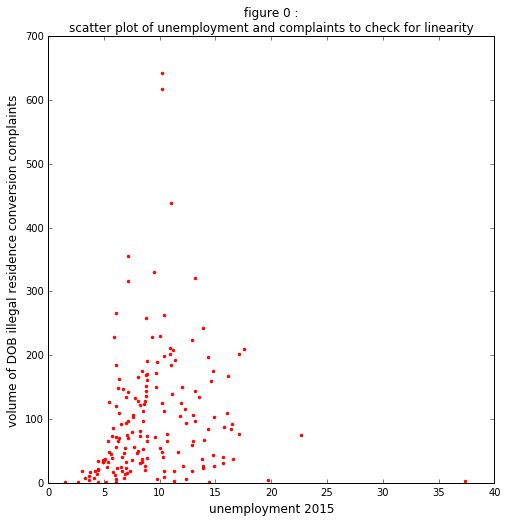

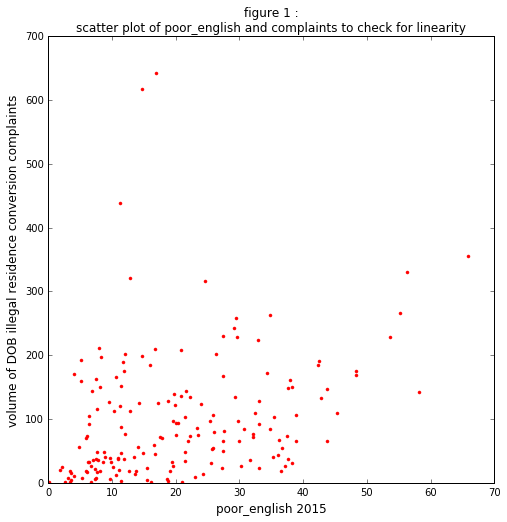

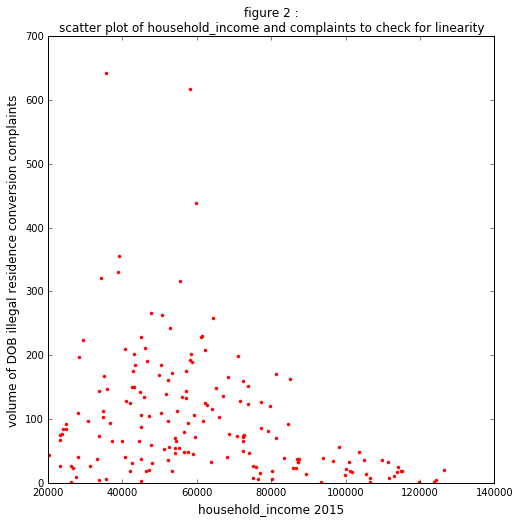

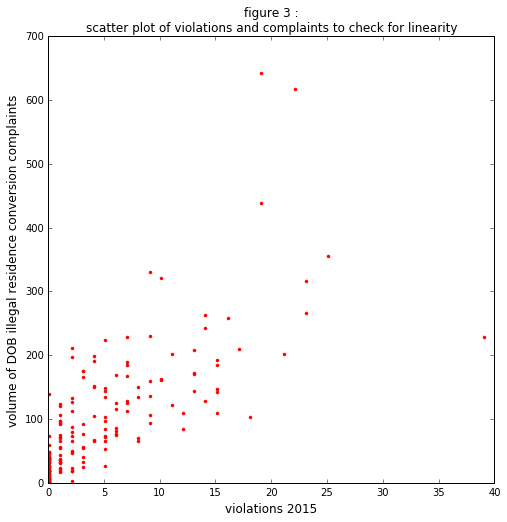

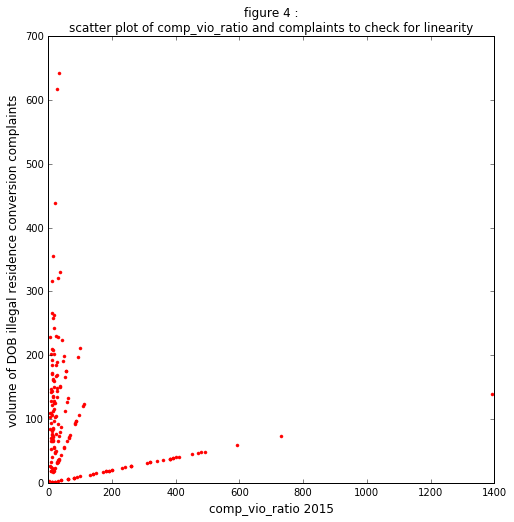

In [20]:
# is the relationship between x and y linear?
for i, elem in enumerate(f):
    plt.figure(figsize=(8,8))
    plt.plot(model[elem], model['complaints'], 'r.')
    plt.title('figure ' + str(i) +  ' :\nscatter plot of ' + elem + ' and complaints to check for linearity', fontsize=12)
    plt.xlabel(elem + ' 2015', fontsize=12)
    plt.ylabel('volume of DOB illegal residence conversion complaints', fontsize=12)

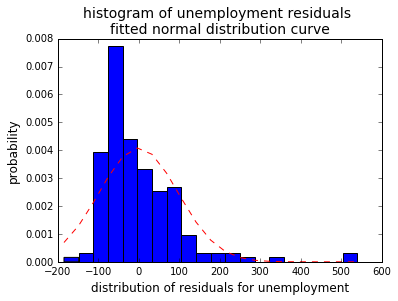

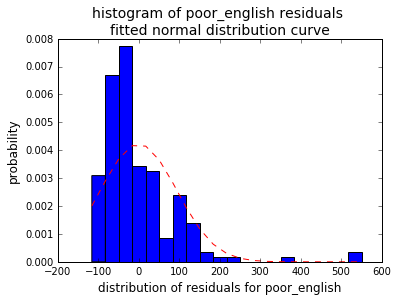

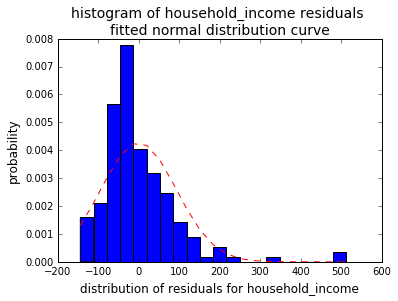

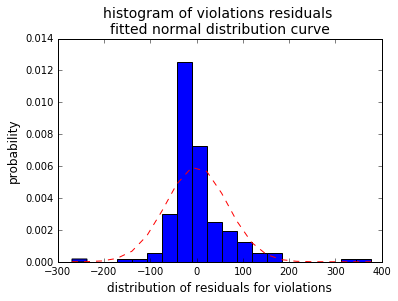

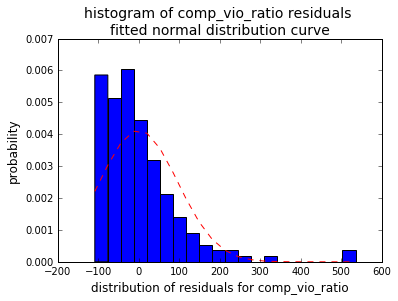

In [21]:
for i, elem in enumerate(features):
    results = smf.ols('complaints ~ ' + elem, data=model).fit()
    residuals = sorted(results.resid) # just in case it isn't sorted

    mu = np.mean(residuals) # mean of distribution
    sigma = np.std(residuals) # standard deviation of distribution

    num_bins = 20
    # the histogram of the data
    n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')

    # add a 'normal best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel('distribution of residuals for ' + elem, fontsize=12)
    plt.ylabel('probability', fontsize=12)
    plt.title('histogram of ' + elem + ' residuals \nfitted normal distribution curve', fontsize=14)

    # tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()

In [22]:
e = []
for elem in features:
    e.append(' + ' + elem)
e = ''.join(e)

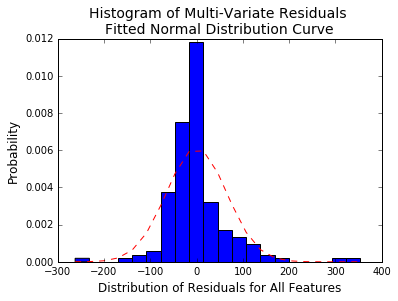

In [23]:
results = smf.ols('complaints ~ ' + e, data=model).fit()
residuals = sorted(results.resid) # just in case it isn't sorted

mu = np.mean(residuals) # mean of distribution
sigma = np.std(residuals) # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(residuals, num_bins, normed=1, facecolor='blue')
 
# add a 'normal best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Distribution of Residuals for All Features', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Histogram of Multi-Variate Residuals \nFitted Normal Distribution Curve', fontsize=14)
 
# tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [24]:
#are the variables correlated with one another
model[f].corr(method='pearson')

,unemployment,poor_english,household_income,violations,comp_vio_ratio
unemployment,1.000000,0.174834,-0.740440,0.112751,-0.056037
poor_english,0.174834,1.000000,-0.571972,0.417126,-0.211796
household_income,-0.740440,-0.571972,1.000000,-0.313553,0.144668
violations,0.112751,0.417126,-0.313553,1.000000,-0.355714
comp_vio_ratio,-0.056037,-0.211796,0.144668,-0.355714,1.000000


In [25]:
#regress without dropping NA
results = smf.ols('complaints ~ ' + e, data=model).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             complaints   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     43.03
Date:                Wed, 01 Feb 2017   Prob (F-statistic):           2.40e-28
Time:                        22:13:03   Log-Likelihood:                -968.28
No. Observations:                 173   AIC:                             1949.
Df Residuals:                     167   BIC:                             1967.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          115.2345     49.311      2.337      0.021      17.881     212.588
unemployment        -1.2620      2.234     -0.565      0.573      -5.672       3.148
poor_english        -0.8936      0.528     -1.691      0.093      -1.937       0.149
household_income    -0.0008      0.000     -1.993      0.048      -0.002   -7.33e-06
violations          11.8860      0.934     12.732      0.000      10.043      13.729
comp_vio_ratio       0.0411      0.033      1.240      0.217      -0.024       0.107
==============================================================================
Omnibus:                       79.200   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.003
Skew:                           1.521   Prob(JB):                    1.01e-119
Kurtosis:                      11.171   Cond. No.                     6.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.279
Date:                Wed, 01 Feb 2017   Prob (F-statistic):             0.0719
Time:                        22:13:04   Log-Likelihood:                -1050.2
No. Observations:                 175   AIC:                             2104.
Df Residuals:                     173   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.4908     17.929      3.876   

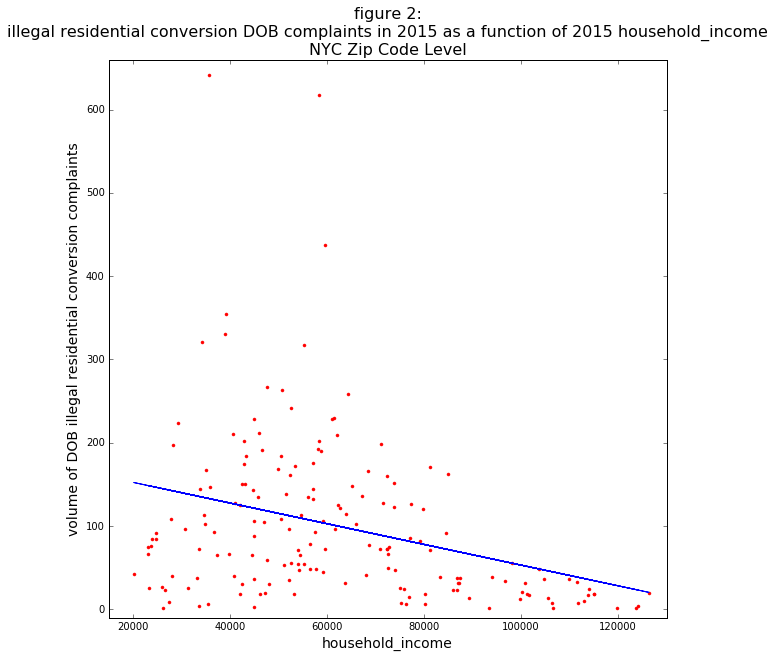

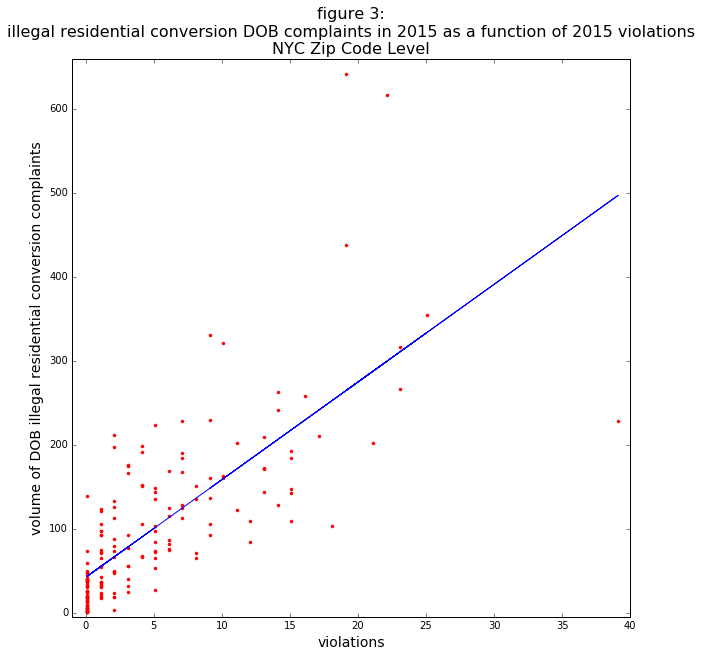

In [26]:
for i, elem in enumerate(features):
    results = smf.ols('complaints ~ ' + elem, data=model).fit()
    print(results.summary())
    if results.rsquared > .1:
        plt.figure(figsize=(10,10))
        plt.plot(model[elem], model['complaints'], 'r.')
        plt.plot(model[elem], results.predict(sm.add_constant(model[elem])), '-')
        plt.title('figure ' + str(i) + ':\nillegal residential conversion DOB complaints in 2015 as a function of 2015 ' + elem + '\nNYC Zip Code Level', fontsize=16)
        plt.xlabel(elem, fontsize=14)
        plt.ylabel('volume of DOB illegal residential conversion complaints', fontsize=14)
        if elem == 'unemployment':
            plt.ylim(-10, 660)
        elif elem == 'poor_english':
            plt.xlim(-2,70)
            plt.ylim(-10,660)
        elif elem == 'household_income':
            plt.xlim(15000,130000)
            plt.ylim(-10,660)
        elif elem == 'violations':
            plt.xlim(-1,40)
            plt.ylim(-5,660)